In [ ]:
# pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [ ]:
# Get the start and end dates.

end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=22
Period for indexes: 1954-04-22 to 2024-04-22 


#### Question_1: Macro Average growth of GDP in 2023.
#### Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). What is the average growth (in %) of GDP in 2023?

In [ ]:
# Get the timeseries data of Real Gross Domestic Product (GDPC1) from FRED
# https://(https://fred.stlouisfed.org/series/GDPC1)

gdpc1 = pdr.DataReader('GDPC1', 'fred', start=start)

gdpc1.sample(10)

,GDPC1
DATE,
1975-04-01,5999.610
1986-07-01,8872.601
1991-07-01,10080.195
1992-10-01,10558.648
2001-01-01,14183.120
2017-04-01,19506.949
1962-04-01,3792.149
2020-04-01,19034.830
2017-10-01,19882.352


In [ ]:
# Get information about the Real Gross Domestic Product (GDPC1)

gdpc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1954-07-01 to 2023-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPC1   278 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [ ]:
# get the year-on-year column from the Real Gross Domestic Product (GDPC1)

gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4) - 1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [ ]:
# Get the timeseries data where Date == 2023

gdpc1_2023 = gdpc1[gdpc1.index >= '2023']
gdpc1_2023

,GDPC1,gdpc1_us_yoy
DATE,,
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [ ]:
# Get the average year-on-year growth of gdpc1_2023

gdpc1_avg = gdpc1_2023['gdpc1_us_yoy'].mean()
gdpc1_avg = (gdpc1_avg * 100).round(1)
gdpc1_avg

2.5

#### Question 2. [Macro] Inverse "Treasury Yield"
#### Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

In [ ]:
# Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10)

dgs2 = pdr.DataReader('DGS2', 'fred', start=start)
dgs10 = pdr.DataReader('DGS10', 'fred', start=start)

In [ ]:
# Get samples of the above interest rate series

dgs2.head(), dgs10.head()

(            DGS2
 DATE            
 1976-06-01  7.26
 1976-06-02  7.23
 1976-06-03  7.22
 1976-06-04  7.12
 1976-06-07  7.09,
             DGS10
 DATE             
 1962-01-02   4.06
 1962-01-03   4.03
 1962-01-04   3.99
 1962-01-05   4.02
 1962-01-08   4.03)

In [ ]:
# join the 2 timeseries dataframe on DATE and drop missing values.

# dgs_join = pd.concat([dgs2, dgs10], axis=1)
dgs_join = dgs2.join(dgs10, how='outer')

#dgs_join = dgs_join.dropna()
dgs_join

,DGS2,DGS10
DATE,,
1962-01-02,NaN,4.06
1962-01-03,NaN,4.03
1962-01-04,NaN,3.99
1962-01-05,NaN,4.02
1962-01-08,NaN,4.03
...,...,...
2024-04-12,4.88,4.50
2024-04-15,4.93,4.63
2024-04-16,4.97,4.67


In [ ]:
# calculate the difference of both dataframes and include the column

dgs_join['dgs10-dgs2'] = dgs_join['DGS10'] - dgs_join['DGS2']
dgs_join.sample(7)

,DGS2,DGS10,dgs10-dgs2
DATE,,,
2016-05-31,0.87,1.84,0.97
1964-07-14,NaN,4.19,NaN
2009-07-20,0.99,3.61,2.62
1998-08-13,5.37,5.44,0.07
1973-05-29,NaN,6.93,NaN
2021-12-29,0.75,1.55,0.80
1985-10-02,8.84,10.30,1.46


In [ ]:
# calculate the minimum value of dgs10-dgs2 after since year 2000.

dgs_join = dgs_join[dgs_join.index > '2000-01-01']
dgs_min = dgs_join['dgs10-dgs2']
dgs_min = dgs_min.min()
dgs_min.round(1)

-1.1

###### An inverted yield curve occurs when long-term interest rates drop below short-term rates. In other words, investors are moving money away from short-term bonds and into long-term ones. This indicates contraction in the markets, and lots of pessimism about future economic outlook. In some cases, it leads to recession. The minimum value of the interest rates (dgs10-dgs2) above outputs a negative, which shows contraction in the market. Inverted yield curve is definitely a good predictive feature

#### Question 3. [Index] Which Index is better recently? Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

In [ ]:
# Download the daily index price for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/)

gspc = yf.download(tickers='^GSPC', period='max', interval='1d')
gspc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000


In [ ]:
# Download the daily index price for IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/)

mxx = yf.download(tickers='^MXX', period='max', interval='1d')
mxx

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-11-08,1418.800049,1418.800049,1418.800049,1418.800049,1418.800049,0
1991-11-11,1416.900024,1416.900024,1416.900024,1416.900024,1416.900024,0
1991-11-12,1445.400024,1445.400024,1445.400024,1445.400024,1445.400024,0
1991-11-13,1453.400024,1453.400024,1453.400024,1453.400024,1453.400024,0
1991-11-14,1459.300049,1459.300049,1459.300049,1459.300049,1459.300049,0
...,...,...,...,...,...,...
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900


In [ ]:
# 5Y daily growth for S&P 500 (between 2019-04-09 and 2024-04-09) with 252 trading days in a year.

gspc_daily = gspc[(gspc.index >= '2019-04-09') & (gspc.index <= '2024-04-09')]
gspc_daily['adj_close_last_year'] = gspc_daily['Adj Close'].shift(252)
gspc_daily['yoy_growth'] = gspc_daily['Adj Close'] / gspc_daily['adj_close_last_year'] - 1
gspc_daily

<ipython-input-16-a096e8245bdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gspc_daily['adj_close_last_year'] = gspc_daily['Adj Close'].shift(252)
<ipython-input-16-a096e8245bdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gspc_daily['yoy_growth'] = gspc_daily['Adj Close'] / gspc_daily['adj_close_last_year'] - 1


,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000,NaN,NaN
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000,NaN,NaN
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000,NaN,NaN
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000,NaN,NaN
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,4109.310059,0.268215
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,4124.509766,0.247957
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000,4100.600098,0.269165


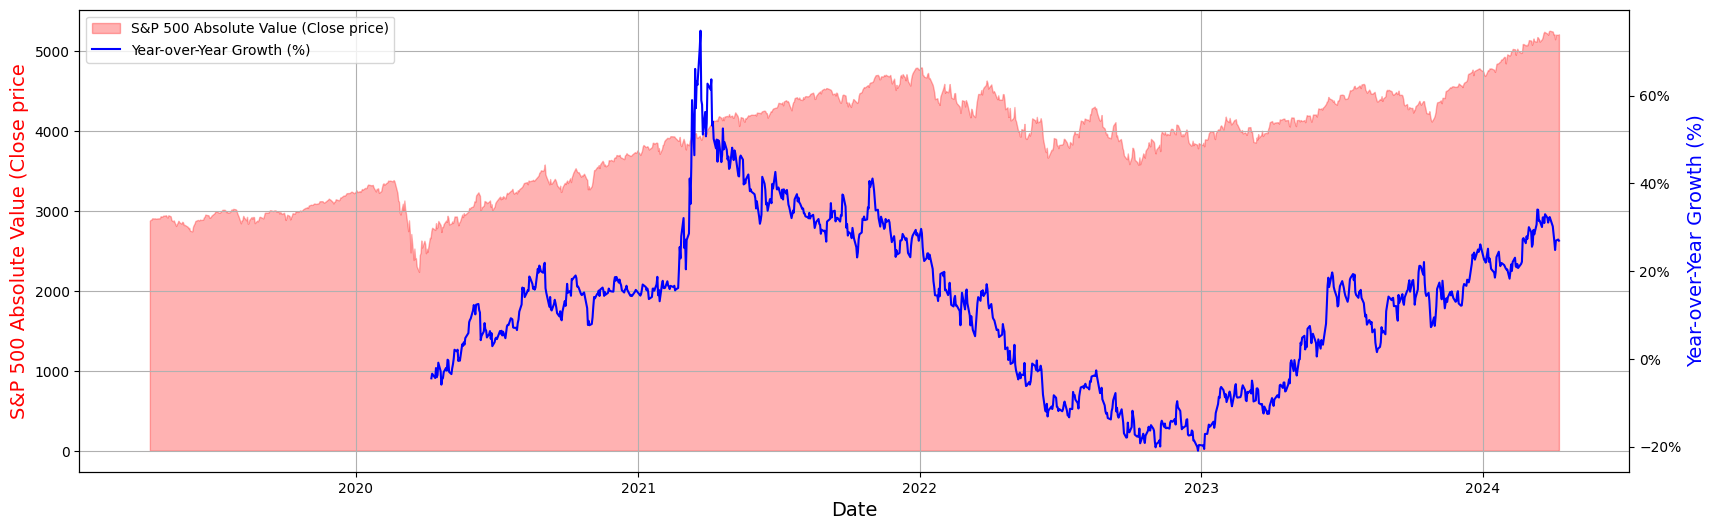

In [ ]:
# Plot of index S&P500
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(gspc_daily.index, gspc_daily.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gspc_daily.yoy_growth,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
# 5Y daily growth for IPC Mexico (between 2019-04-09 and 2024-04-09) with 252 trading days in a year.

mxx_daily = mxx[(mxx.index >= '2019-04-09') & (mxx.index <= '2024-04-09')]
mxx_daily['adj_close_last_year'] = mxx_daily['Adj Close'].shift(252)
mxx_daily['yoy_growth'] = mxx_daily['Adj Close'] / mxx_daily['adj_close_last_year'] - 1
mxx_daily

<ipython-input-18-b74810d362ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxx_daily['adj_close_last_year'] = mxx_daily['Adj Close'].shift(252)
<ipython-input-18-b74810d362ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxx_daily['yoy_growth'] = mxx_daily['Adj Close'] / mxx_daily['adj_close_last_year'] - 1


,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000,NaN,NaN
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900,NaN,NaN
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000,NaN,NaN
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400,NaN,NaN
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300,54198.941406,0.060969
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700,53904.000000,0.073812
2024-04-05,57805.191406,58227.839844,57678.609375,58092.441406,58092.441406,212252300,53896.351562,0.077855


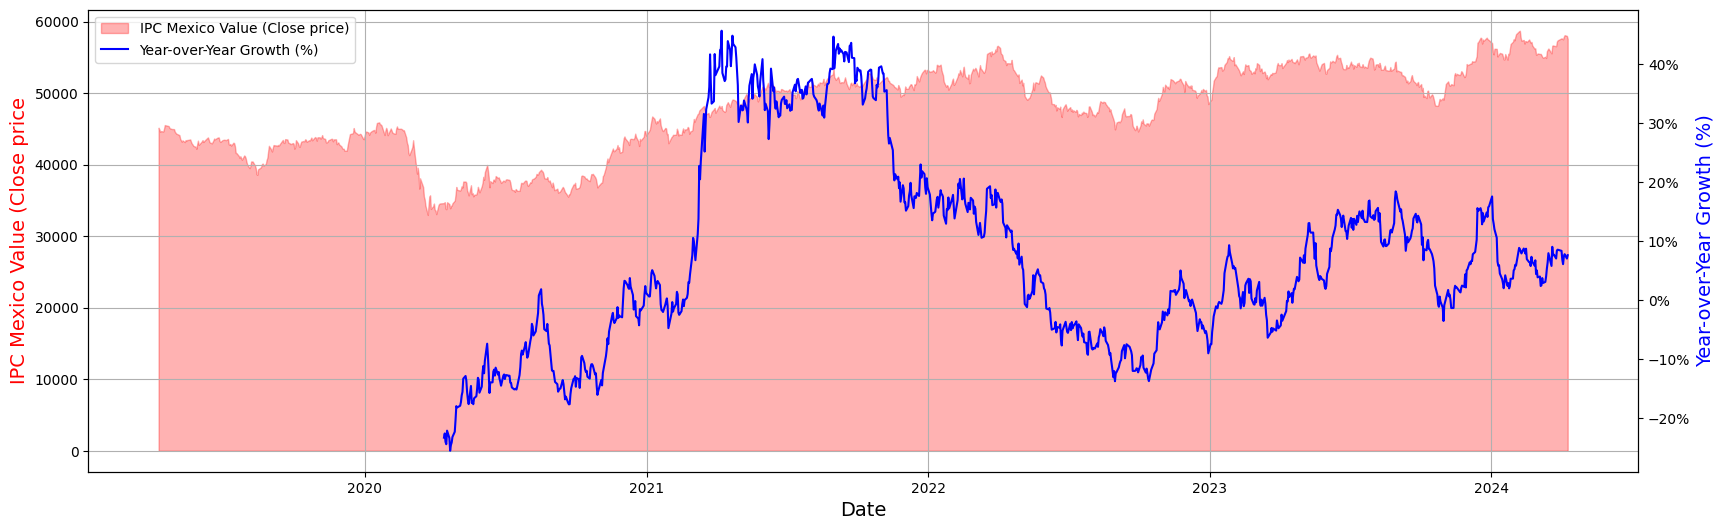

In [ ]:
# Plot of index IPC Mexico
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(mxx_daily.index, mxx_daily.Close, color="red", alpha=0.3, label="IPC Mexico Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(mxx_daily.yoy_growth,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("IPC Mexico Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

#### The % growth of index S&P 500 is about 38% and the % growth rate for IPC Mexico is about 9%. From this indication, S&P 500 is higher growing index.

In [ ]:
# Putting the above procedures in a function

def index_growth(data, year_start, year_end):

  # Download the index dataframe from Yahoo Finance
  indx = yf.download(tickers=data, period='max', interval='1d')

  # daily growth for index (between year_start and year_end) with 252 trading days in a year.
  indx_daily = indx[(indx.index >= f'{year_start}') & (indx.index <= f'{year_end}')]
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1

  # Plot of Yahoo finance index
  fig, ax = plt.subplots(figsize=(20, 6))
  plt.grid(True)

  # Plotting area under CPI
  ax.fill_between(indx_daily.index, indx_daily.Close, color="red", alpha=0.3, label=f"{data} Value (Close price)")

  # Creating a secondary y-axis for CPI growth percentage
  ax2 = ax.twinx()
  ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
  ax2.plot(indx_daily.yoy_growth,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

  # Setting labels and title
  ax.set_xlabel("Date", fontsize=14)
  ax.set_ylabel(f"{data} Value (Close price", color="red", fontsize=14)
  ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

  # Adding legend
  lines, labels = ax.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels + labels2, loc='upper left')

  return plt.show()

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


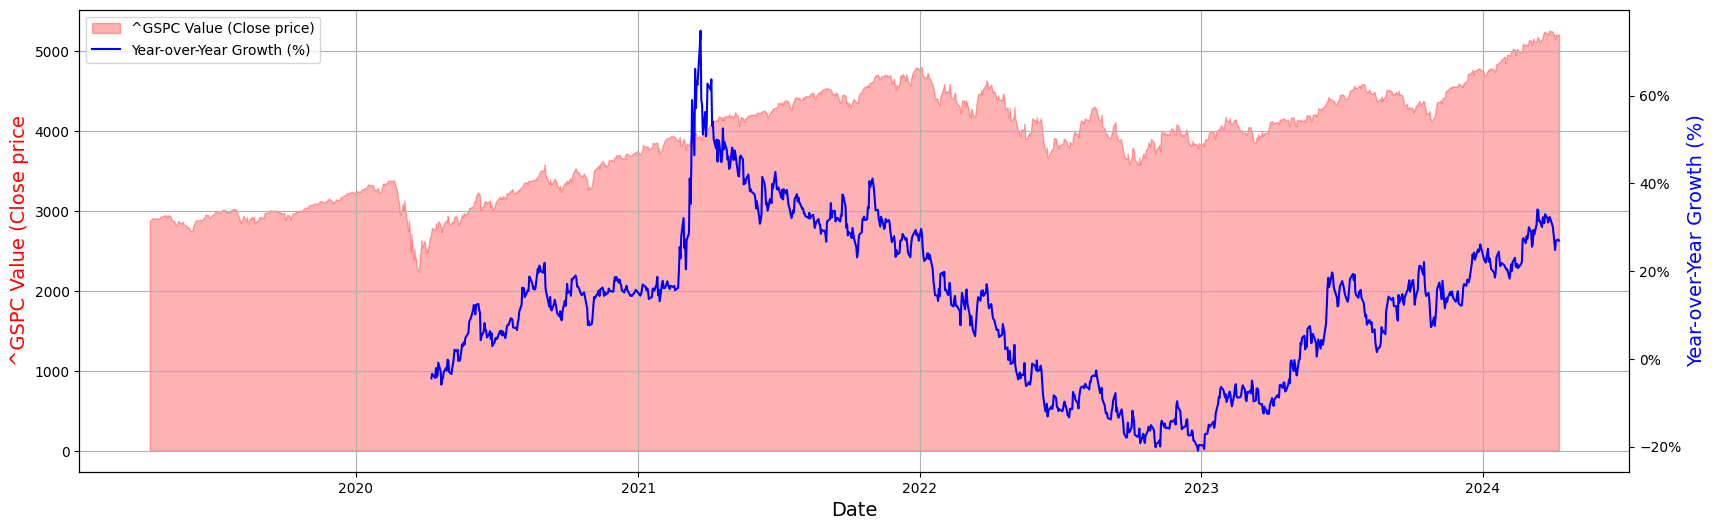

In [ ]:
# Plot of 5Y daily growth for index S&P 500 (between 2019-04-09 and 2024-04-09) with 252 trading days in a year.

index_growth('^GSPC', '2019-04-09', '2024-04-09')

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


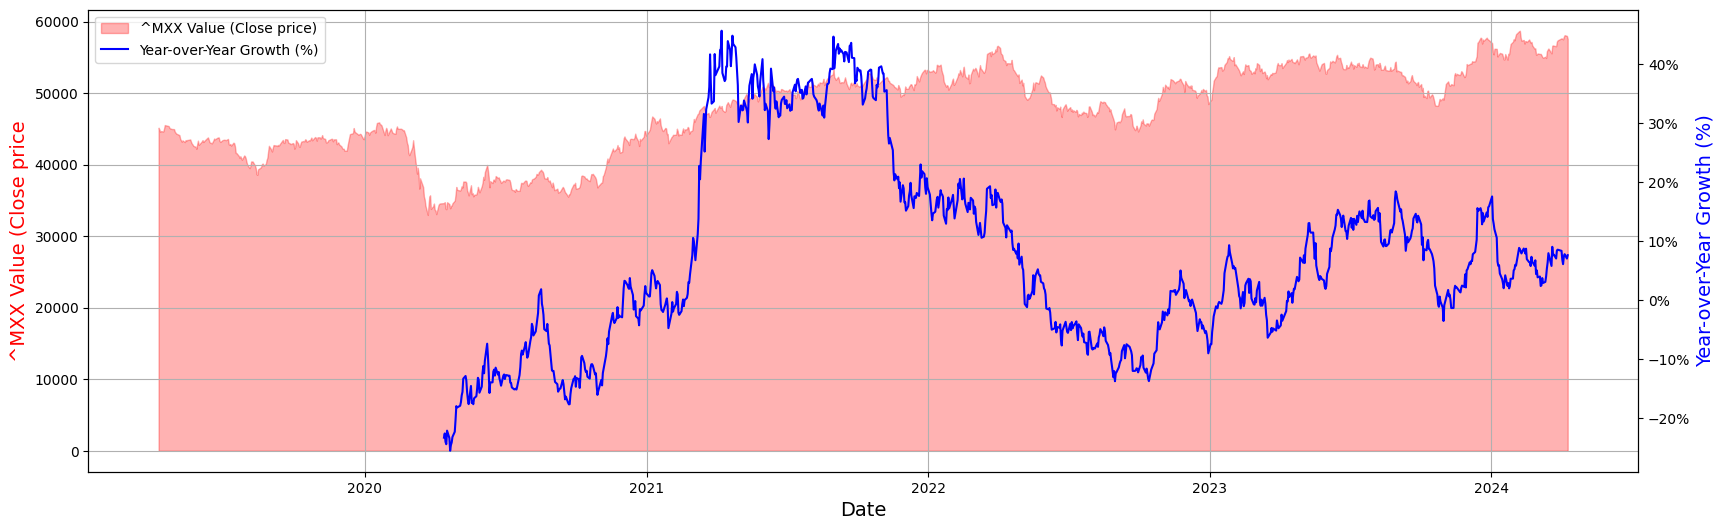

In [ ]:
# Plot of 5Y daily growth for index IPC Mexico (between 2019-04-09 and 2024-04-09) with 252 trading days in a year.

index_growth('^MXX', '2019-04-09', '2024-04-09')

##### The S&P 500 has a higher percentage growth than IPC Mexico

#### Question 3b: Additional plots and average of 2 other indexes in Yahoo Finance-(Dow Jones Industrial Average ^DJI and ^IXIC	NASDAQ Composite) for 10Y growth stats.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


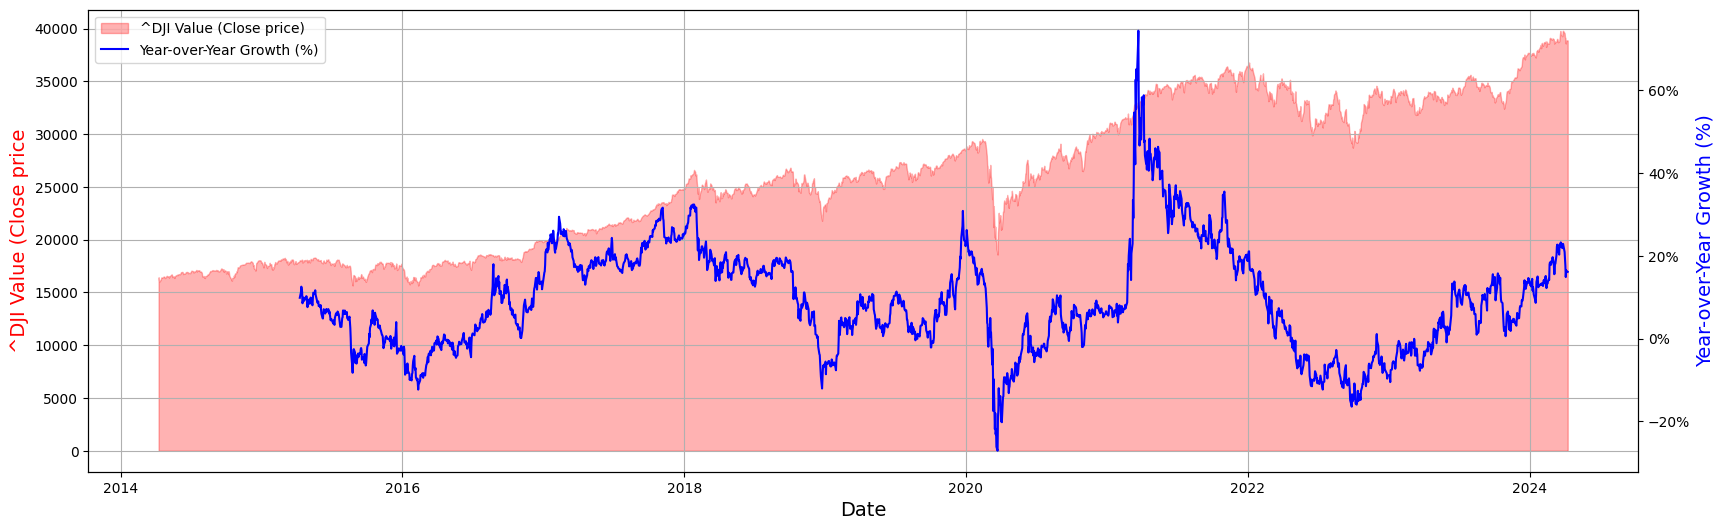

In [ ]:
# Plot of Dow Jones Industrial Average ^DJI for 10Y growth.

index_growth('^DJI', '2014-04-09', '2024-04-09')

##### Dow Jones has a yearly growth of 23% for 10Y period.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


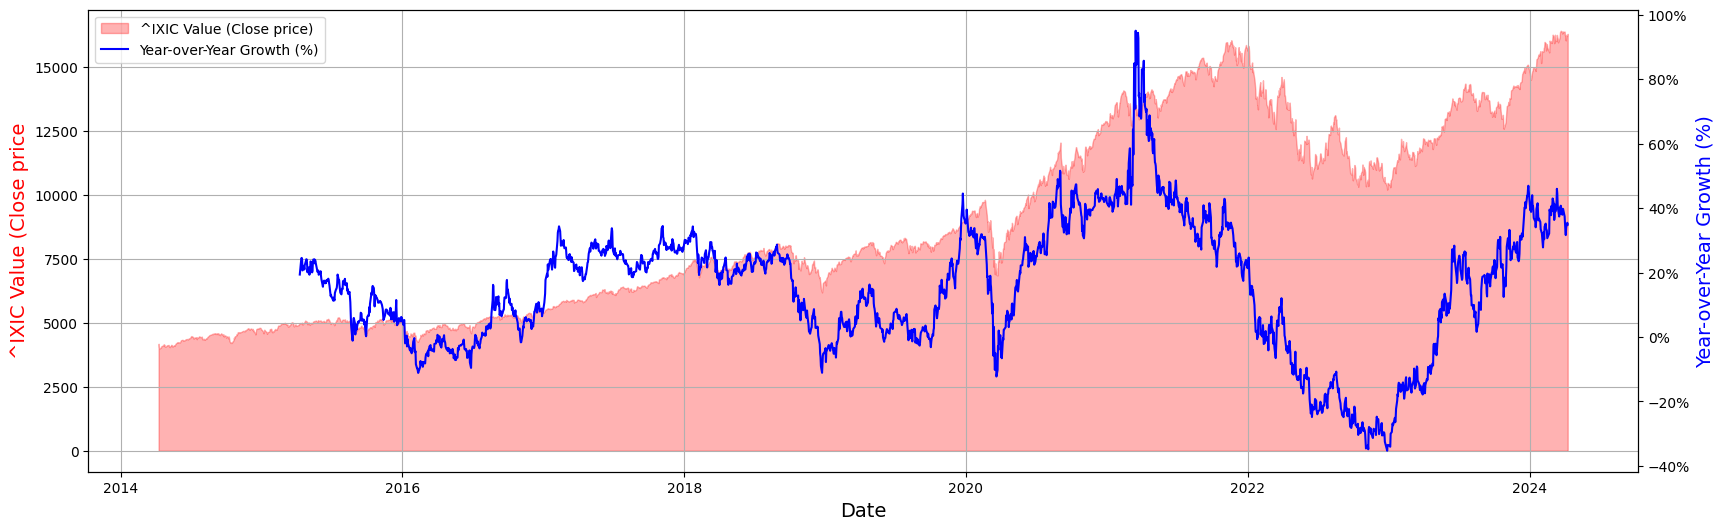

In [ ]:
# Plot of NASDAQ Composite ^IXIC for 10Y growth.

index_growth('^IXIC', '2014-04-09', '2024-04-09')

##### NASDAQ Composite has a yearly growth of about 42% for 10Y period, which is higher than DOW Jones Industrial average.

#### Question 3b: Additional plots and average of 2 other indexes in Yahoo Finance-(^RUT Russell 2000 and ^AORD	ALL ORDINARIES) for 20Y growth stats.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


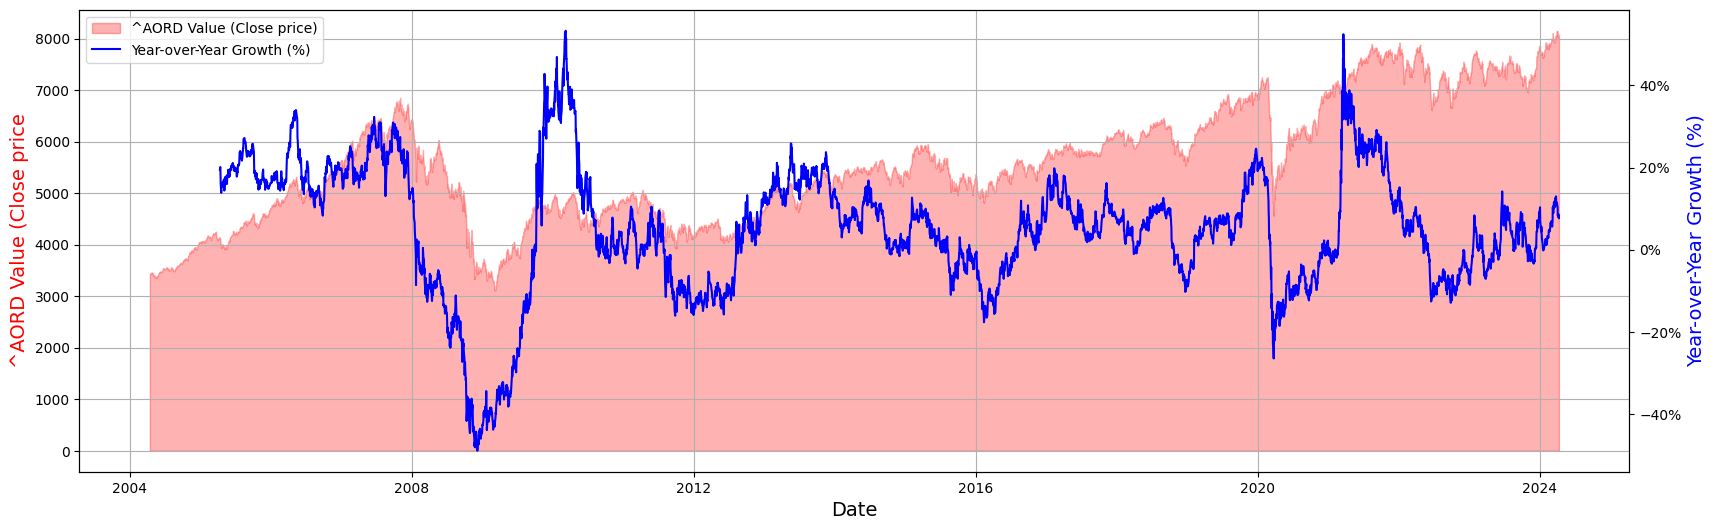

In [ ]:
# Plot of ^AORD ALL ORDINARIES for 20Y growth.

index_growth('^AORD', '2004-04-09', '2024-04-09')

##### ^AORD All ORDINARIES has a yearly growth of 18% for 20Y period.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-20-5c59bc09e786>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['adj_close_last_year'] = indx_daily['Adj Close'].shift(252)
<ipython-input-20-5c59bc09e786>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_daily['yoy_growth'] = indx_daily['Adj Close'] / indx_daily['adj_close_last_year'] - 1


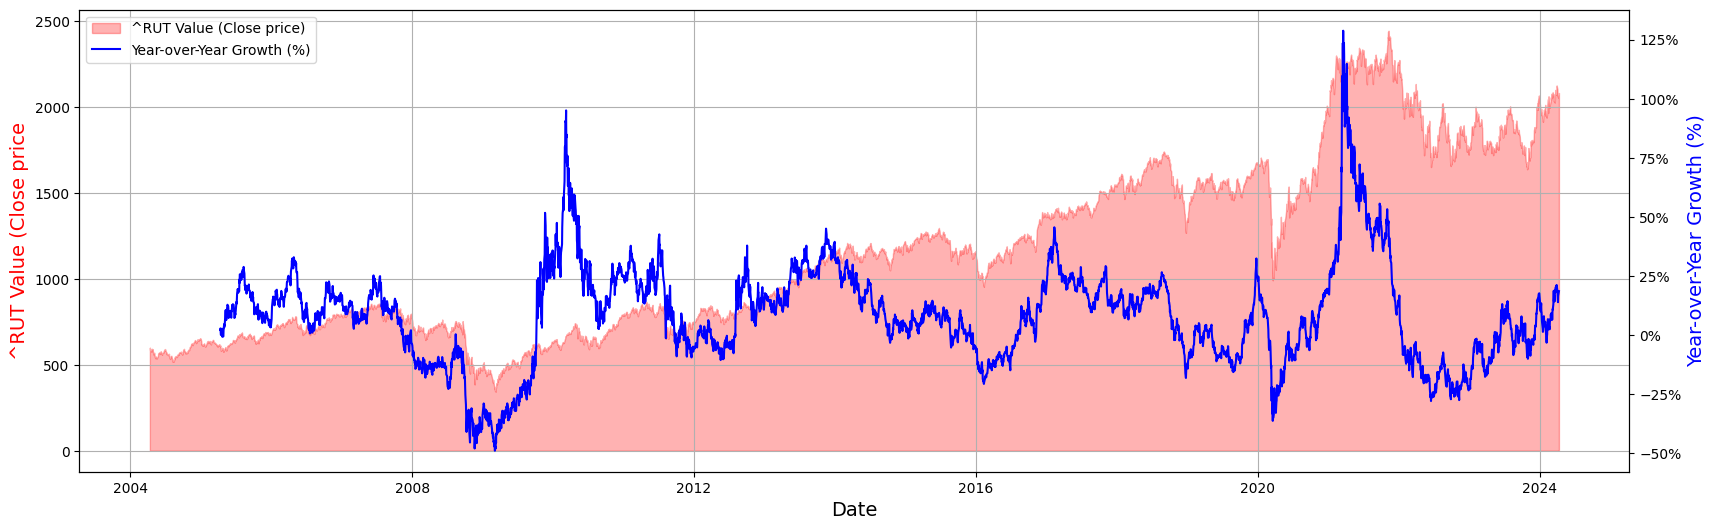

In [ ]:
# Plot of ^RUT Russell 2000 for 20Y growth.

index_growth('^RUT', '2004-04-09', '2024-04-09')

##### ^RUT Russell 2000 has a growth rate of about 25% which is higher than ^AORD ALL ORDINARIES 18% for a 20Y growth period.

#### Question 3c: What is an average yearly growth rate (CAGR) for each of the selected indexes (^DJI-Dow Jones Industrial Average, ^IXIC-NASDAQ Composite, ^RUT Russell 2000 and ^AORD ALL ORDINARIES)

In [ ]:
# Function to find the average yearly growth rate

def avg_yoy(indices, year_start, year_end):

  # Download the index dataframe from Yahoo Finance

  ticker = yf.download(tickers=indices, period='max', interval='1d')

  # daily growth for tickers (between year_start and year_end) with 252 trading days in a year.
  ticker_daily = ticker[(ticker.index >= f'{year_start}') & (ticker.index <= f'{year_end}')]
  ticker_daily['adj_close_last_year'] = ticker_daily['Adj Close'].shift(252)
  ticker_daily['yoy_growth'] = ticker_daily['Adj Close'] / ticker_daily['adj_close_last_year'] - 1
  ticker_avg = ticker_daily['yoy_growth'].mean()

  print (f'the average yearly growth rate of {indices} is {ticker_avg.round(2)}')

  #return f'{ticker_avg}'


In [ ]:
# average yearly growth rate of ^DJI Dow Jones Industrial Average for 10Y period

avg_yoy('^DJI', '2014-04-09', '2024-04-09')

[*********************100%%**********************]  1 of 1 completed

the average yearly growth rate of ^DJI is 0.09



<ipython-input-27-ee9c38cbee34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['adj_close_last_year'] = ticker_daily['Adj Close'].shift(252)
<ipython-input-27-ee9c38cbee34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['yoy_growth'] = ticker_daily['Adj Close'] / ticker_daily['adj_close_last_year'] - 1


In [ ]:
# average yearly growth rate of ^IXIC-NASDAQ Composite for 10Y period

avg_yoy('^IXIC', '2014-04-09', '2024-04-09')

[*********************100%%**********************]  1 of 1 completed

the average yearly growth rate of ^IXIC is 0.15



<ipython-input-27-ee9c38cbee34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['adj_close_last_year'] = ticker_daily['Adj Close'].shift(252)
<ipython-input-27-ee9c38cbee34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['yoy_growth'] = ticker_daily['Adj Close'] / ticker_daily['adj_close_last_year'] - 1


In [ ]:
# average yearly growth rate of ^RUT-Russell 2000 for 20Y period

avg_yoy('^RUT', '2004-04-09', '2024-04-09')

[*********************100%%**********************]  1 of 1 completed

the average yearly growth rate of ^RUT is 0.08



<ipython-input-27-ee9c38cbee34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['adj_close_last_year'] = ticker_daily['Adj Close'].shift(252)
<ipython-input-27-ee9c38cbee34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['yoy_growth'] = ticker_daily['Adj Close'] / ticker_daily['adj_close_last_year'] - 1


In [ ]:
# average yearly growth rate of ^AORD ALL ORDINARIES for 20Y period

avg_yoy('^AORD', '2004-04-09', '2024-04-09')

[*********************100%%**********************]  1 of 1 completed

the average yearly growth rate of ^AORD is 0.05



<ipython-input-27-ee9c38cbee34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['adj_close_last_year'] = ticker_daily['Adj Close'].shift(252)
<ipython-input-27-ee9c38cbee34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_daily['yoy_growth'] = ticker_daily['Adj Close'] / ticker_daily['adj_close_last_year'] - 1


#### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM). Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

In [ ]:
# Data of Stock 2222.SR

sr2222 = yf.download(tickers='2222.SR', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sr2222.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,30.400000,30.450001,29.799999,29.900000,29.900000,24539116
2024-04-17,30.049999,30.150000,29.900000,29.950001,29.950001,16440263
2024-04-18,30.000000,30.049999,29.850000,29.900000,29.900000,7985988
2024-04-21,30.000000,30.200001,29.900000,30.049999,30.049999,8988623
2024-04-22,30.100000,30.250000,30.000000,30.150000,30.150000,12033500


In [ ]:
# 2023 for Stock 2222.SR

sr2222_2023 = sr2222[(sr2222.index > '2022-12-31') & (sr2222.index < '2024')]
sr2222_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475792,1569087
2023-01-02,29.545454,29.545454,29.227272,29.227272,28.256073,4693364
2023-01-03,29.227272,29.227272,29.227272,29.227272,28.256073,0
2023-01-04,29.181818,29.227272,28.681818,28.818180,27.860577,4618455
2023-01-05,28.818180,28.818180,28.363636,28.681818,27.728743,4797670
...,...,...,...,...,...,...
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967
2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683


In [ ]:
# Max and Min of the Adj close of stock 2222.SR

sr2222_2023['Adj Close'].max(), sr2222_2023['Adj Close'].min()

(34.66025161743164, 27.245359420776367)

In [ ]:
# Largest range ratio of stock 2222.SR rounded off to 2dp

((sr2222_2023['Adj Close'].max() - sr2222_2023['Adj Close'].min()) / sr2222_2023['Adj Close'].max()).round(2)

0.21

In [ ]:
# Data of OHLCV Stock BRK-B

brkb = yf.download(tickers='BRK-B', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
brkb.sample(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,312.820007,317.290009,312.429993,316.970001,316.970001,4889800
2009-10-22,65.879997,66.779999,65.440002,66.779999,66.779999,1790000
2012-07-13,83.769997,84.489998,83.510002,84.480003,84.480003,3833700
2019-11-26,219.110001,219.199997,217.720001,218.899994,218.899994,3717800
2004-05-28,59.320000,59.500000,59.200001,59.439999,59.439999,225000
2023-07-24,346.769989,351.190002,346.279999,349.630005,349.630005,3269400


In [ ]:
# 2023 for Stock BRK-B

brkb_2023 = brkb[(brkb.index > '2022-12-31') & (brkb.index < '2024')]
brkb_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,310.070007,312.390015,307.380005,309.910004,309.910004,3549900
2023-01-04,312.000000,316.890015,311.250000,314.549988,314.549988,5121200
2023-01-05,313.570007,314.230011,310.000000,312.899994,312.899994,3416300
2023-01-06,315.000000,320.160004,313.380005,318.690002,318.690002,3647900
2023-01-09,319.019989,320.500000,314.750000,315.529999,315.529999,4397400
...,...,...,...,...,...,...
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200
2023-12-26,356.899994,357.769989,356.079987,356.829987,356.829987,1964400
2023-12-27,355.929993,357.079987,355.500000,356.950012,356.950012,2478500


In [ ]:
# Max and Min of the Adj close of stock BRK-B

brkb_2023['Adj Close'].max(), brkb_2023['Adj Close'].min()

(370.4800109863281, 293.510009765625)

In [ ]:
# Largest range ratio of stock BRK-B rounded off to 2dp

((brkb_2023['Adj Close'].max() - brkb_2023['Adj Close'].min()) / brkb_2023['Adj Close'].max()).round(2)

0.21

In [ ]:
# Data of OHLCV Stock AAPL

aapl = yf.download(tickers='AAPL', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 2023 for Stock AAPL

aapl_2023 = aapl[(aapl.index > '2022-12-31') & (aapl.index < '2024')]
aapl_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497505,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [ ]:
# Max and Min of the Adj close of stock AAPL

aapl_2023['Adj Close'].max(), aapl_2023['Adj Close'].min()

(197.85752868652344, 124.16664123535156)

In [ ]:
# Largest range ratio of stock AAPL rounded off to 2dp

((aapl_2023['Adj Close'].max() - aapl_2023['Adj Close'].min()) / aapl_2023['Adj Close'].max()).round(2)

0.37

In [ ]:
# Data of OHLCV Stock MSFT

msft = yf.download(tickers='MSFT', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 2023 for Stock MSFT

msft_2023 = msft[(msft.index > '2022-12-31') & (msft.index < '2024')]
msft_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.035995,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,226.667297,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,219.949387,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,222.541550,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,224.708313,27369800
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400


In [ ]:
# Max and Min of the Adj close of stock MSFT

msft_2023['Adj Close'].max(), msft_2023['Adj Close'].min()

(381.9936218261719, 219.9493865966797)

In [ ]:
# Largest range ratio of stock MSFT rounded off to 2dp

((msft_2023['Adj Close'].max() - msft_2023['Adj Close'].min()) / msft_2023['Adj Close'].max()).round(2)

0.42

In [ ]:
# Data of OHLCV Stock GOOG

goog = yf.download(tickers='GOOG', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 2023 for Stock GOOG

goog_2023 = goog[(goog.index > '2022-12-31') & (goog.index < '2024')]
goog_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


In [ ]:
# Max and Min of the Adj close of stock GooG

goog_2023['Adj Close'].max(), goog_2023['Adj Close'].min()

(142.82000732421875, 86.7699966430664)

In [ ]:
# Largest range ratio of stock GOOG rounded off to 2dp

((goog_2023['Adj Close'].max() - goog_2023['Adj Close'].min()) / goog_2023['Adj Close'].max()).round(2)

0.39

In [ ]:
# Data of OHLCV Stock JPM

jpm = yf.download(tickers='JPM', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 2023 for Stock JPM

jpm_2023 = jpm[(jpm.index > '2022-12-31') & (jpm.index < '2024')]
jpm_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,135.240005,136.740005,133.889999,135.119995,129.648483,11054800
2023-01-04,135.990005,137.679993,135.570007,136.380005,130.857483,11687600
2023-01-05,135.660004,135.710007,133.699997,135.350006,130.828476,8381300
2023-01-06,136.130005,138.380005,134.490005,137.940002,133.331970,10029100
2023-01-09,138.600006,138.880005,136.880005,137.369995,132.781006,8482300
...,...,...,...,...,...,...
2023-12-22,167.500000,168.229996,167.229996,167.399994,165.409210,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,166.387451,4683600
2023-12-27,167.839996,169.470001,167.580002,169.399994,167.385437,6428600


In [ ]:
# Max and Min of the Adj close of stock JPM

jpm_2023['Adj Close'].max(), jpm_2023['Adj Close'].min()

(168.27474975585938, 120.73724365234375)

In [ ]:
# Largest range ratio of stock JPM rounded off to 2dp

((jpm_2023['Adj Close'].max() - jpm_2023['Adj Close'].min()) / jpm_2023['Adj Close'].max()).round(2)

0.28

##### Largest range ratio is important because it informs any prospective investor how profitable the stock is when it closes.

#### Question 5. [Stocks] Dividend Yield. Find the largest dividend yield for the same set of stocks (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM).

In [ ]:
# Stock 2222.SR

srr = yf.Ticker('2222.SR')
dir(srr)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_target',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_forecasts',
 'earnings_trend',
 'fast_info',
 'financials',
 'get_actions',
 'get_analyst_price_ta

In [ ]:
# Series dividend of stock 2222.SR

srr_div = srr.dividends
srr_div

Date
2020-03-19 00:00:00+03:00    0.060992
2020-05-31 00:00:00+03:00    0.290744
2020-08-12 00:00:00+03:00    0.290744
2020-11-10 00:00:00+03:00    0.290744
2021-03-23 00:00:00+03:00    0.290744
2021-05-17 00:00:00+03:00    0.290744
2021-08-16 00:00:00+03:00    0.290744
2021-11-07 00:00:00+03:00    0.290744
2022-05-24 00:00:00+03:00    0.290727
2022-08-22 00:00:00+03:00    0.290727
2022-11-09 00:00:00+03:00    0.290727
2023-03-15 00:00:00+03:00    0.302364
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
2024-03-14 00:00:00+03:00    0.167000
Name: Dividends, dtype: float64

In [ ]:
# Dividends of stock 2222.SR for 2023

srr_div[(srr_div.index > '2022-11-09') & (srr_div.index < '2024-03-14')]

Date
2023-03-15 00:00:00+03:00    0.302364
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
Name: Dividends, dtype: float64

In [ ]:
# Sum of dividends of stock 2222.SR for 2023

srr_divsum = (srr_div[(srr_div.index > '2022-11-09') & (srr_div.index < '2024-03-14')]).sum()
srr_divsum

0.9107640000000001

In [ ]:
# closing price (Adj.Close) of stock 2222.SR at the last trading day of the year 2023

srr_CP = sr2222_2023['Adj Close'].loc['2023-12-31']
srr_CP

32.82804870605469

In [ ]:
# Maximum value/largest dividend yield of stock 2222.SR

srr_max = (srr_divsum / srr_CP) * 100
srr_max.round(1)

2.8

In [ ]:
# Stock BRK-B

brkbb = yf.Ticker('BRK-B')


In [ ]:
# Series dividend of stock BRK-B

brkbb.get_actions()

,Dividends,Stock Splits
Date,,
2010-01-21 00:00:00-05:00,0.0,50.0


In [ ]:
brkbb.dividends

Series([], Name: Dividends, dtype: float64)

##### Stock BRK-B has no dividends for 2023

In [ ]:
# Stock AAPL

appl = yf.Ticker('AAPL')


In [ ]:
# Series dividend of stock AAPL

appl_div = appl.dividends
appl_div

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
Name: Dividends, Length: 82, dtype: float64

In [ ]:
# Dividends of stock AAPL for 2023

appl_div[(appl_div.index > '2022-11-04') & (appl_div.index < '2024-02-09')]

Date
2023-02-10 00:00:00-05:00    0.23
2023-05-12 00:00:00-04:00    0.24
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
Name: Dividends, dtype: float64

In [ ]:
# Sum of dividends of stock AAPL for 2023

appl_divsum = (appl_div[(appl_div.index > '2022-11-04') & (appl_div.index < '2024-02-09')]).sum()
appl_divsum

0.95

In [ ]:
# closing price (Adj.Close) of stock AAPL at the last trading day of the year 2023

appl_CP = aapl_2023['Adj Close'].loc['2023-12-29']
appl_CP

192.28463745117188

In [ ]:
# Maximum value/largest dividend yield of stock AAPL

appl_max = (appl_divsum / appl_CP) * 100
appl_max.round(1)

0.5

In [ ]:
# Stock MSFT

msfft = yf.Ticker('MSFT')

In [ ]:
# Series dividend of stock MSFT

msft_div = msfft.dividends
msft_div

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
2024-02-14 00:00:00-05:00    0.75
Name: Dividends, Length: 81, dtype: float64

In [ ]:
# Dividends of stock MSFT for 2023

msft_div[(msft_div.index > '2022-11-16') & (msft_div.index < '2024-02-14')]

Date
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
Name: Dividends, dtype: float64

In [ ]:
# Sum of dividends of stock MSFT for 2023

msft_divsum = (msft_div[(msft_div.index > '2022-11-16') & (msft_div.index < '2024-02-14')]).sum()
msft_divsum

2.79

In [ ]:
# closing price (Adj.Close) of stock MSFT at the last trading day of the year 2023

msft_CP = msft_2023['Adj Close'].loc['2023-12-29']
msft_CP

375.34588623046875

In [ ]:
# Maximum value/largest dividend yield of stock MSFT

msft_max = (msft_divsum / msft_CP) * 100
msft_max.round(1)

0.7

In [ ]:
# Stock GOOG

gog = yf.Ticker('GOOG')

In [ ]:
# Series dividend of stock GOOG

goog_div = gog.dividends
goog_div

Series([], Name: Dividends, dtype: float64)

In [ ]:
gog.get_actions()

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000


##### Stock GOOG has no dividends for 2023

In [ ]:
# Stock JPM

jpmm = yf.Ticker('JPM')

In [ ]:
# Series dividend of stock JPM

jpm_div = jpmm.dividends
jpm_div

Date
1984-03-09 00:00:00-05:00    0.196667
1984-06-11 00:00:00-04:00    0.196667
1984-09-10 00:00:00-04:00    0.196667
1984-12-10 00:00:00-05:00    0.196667
1985-03-11 00:00:00-05:00    0.206667
                               ...   
2023-04-05 00:00:00-04:00    1.000000
2023-07-05 00:00:00-04:00    1.000000
2023-10-05 00:00:00-04:00    1.050000
2024-01-04 00:00:00-05:00    1.050000
2024-04-04 00:00:00-04:00    1.150000
Name: Dividends, Length: 162, dtype: float64

In [ ]:
# Dividends of stock JPM for 2023

jpm_div[(jpm_div.index > '2022-12-31') & (jpm_div.index < '2024-01-04')]

Date
2023-01-05 00:00:00-05:00    1.00
2023-04-05 00:00:00-04:00    1.00
2023-07-05 00:00:00-04:00    1.00
2023-10-05 00:00:00-04:00    1.05
Name: Dividends, dtype: float64

In [ ]:
# Sum of dividends of stock JPM for 2023

jpm_divsum = (jpm_div[(jpm_div.index > '2022-12-31') & (jpm_div.index < '2024-01-04')]).sum()
jpm_divsum

4.05

In [ ]:
# closing price (Adj.Close) of stock AAPL at the last trading day of the year 2023

jpm_CP = jpm_2023['Adj Close'].loc['2023-12-29']
jpm_CP

168.07713317871094

In [ ]:
# Maximum value/largest dividend yield of stock AAPL

jpm_max = (jpm_divsum / jpm_CP) * 100
jpm_max.round(1)

2.4

#### Question 6. [Exploratory] Investigate new metrics

##### Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

In [ ]:
# Time series data of Unemployment(UNEMPLOY) metric from FRED

unemploy = pdr.DataReader('UNEMPLOY', 'fred', start=start)
unemploy

,UNEMPLOY
DATE,
1954-05-01,3767
1954-06-01,3551
1954-07-01,3659
1954-08-01,3854
1954-09-01,3927
...,...
2023-11-01,6262
2023-12-01,6268
2024-01-01,6124


In [ ]:
# get the year-on-year unemployment % from the UNEMPLOYMENT metric

unemploy['unemploy_us_yoy'] = unemploy.UNEMPLOY / unemploy.UNEMPLOY.shift(4) - 1
unemploy.tail()

,UNEMPLOY,unemploy_us_yoy
DATE,,
2023-11-01,6262,0.060637
2023-12-01,6268,-0.011356
2024-01-01,6124,-0.035135
2024-02-01,6458,0.002328
2024-03-01,6429,0.026669


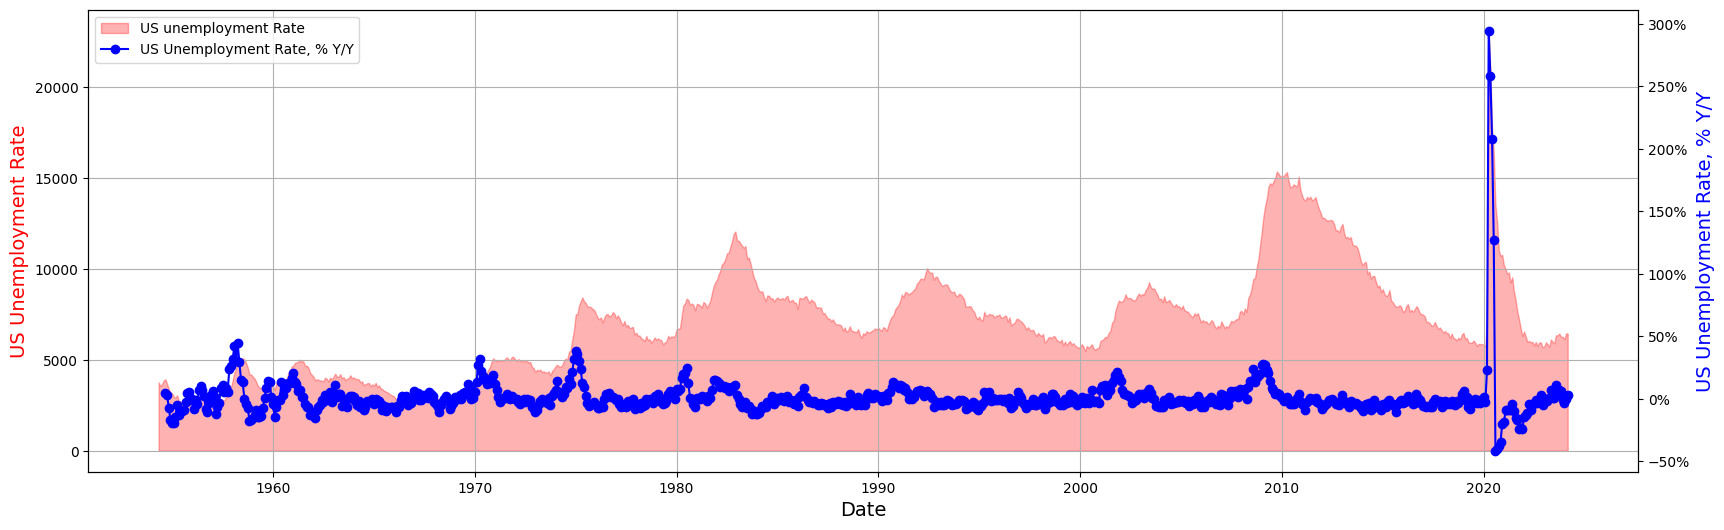

In [ ]:
# Plot of the Unemployment rate

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(unemploy.index, unemploy.UNEMPLOY, color="red", alpha=0.3, label="US unemployment Rate")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(unemploy.unemploy_us_yoy, color="blue", marker="o", label="US Unemployment Rate, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Unemployment Rate", color="red", fontsize=14)
ax2.set_ylabel("US Unemployment Rate, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

##### The unemployment metric plot gives about 10%, which is important for my project to know the percentage of unemployed/underemployed individuals in the US economy.

In [ ]:
# Time series data of Disposable Personal Income (DSPI) metric from FRED

dspi = pdr.DataReader('DSPI', 'fred', start=start)
dspi

,DSPI
DATE,
1959-01-01,351.5
1959-02-01,352.9
1959-03-01,355.2
1959-04-01,358.2
1959-05-01,360.3
...,...
2023-10-01,20437.7
2023-11-01,20513.5
2023-12-01,20581.1


In [ ]:
# get the year-on-year disposable personal income %.

dspi['dspi_us_yoy'] = dspi.DSPI / dspi.DSPI.shift(4) - 1
dspi.tail()

,DSPI,dspi_us_yoy
DATE,,
2023-10-01,20437.7,0.011347
2023-11-01,20513.5,0.013403
2023-12-01,20581.1,0.012531
2024-01-01,20658.9,0.013064
2024-02-01,20709.3,0.013289


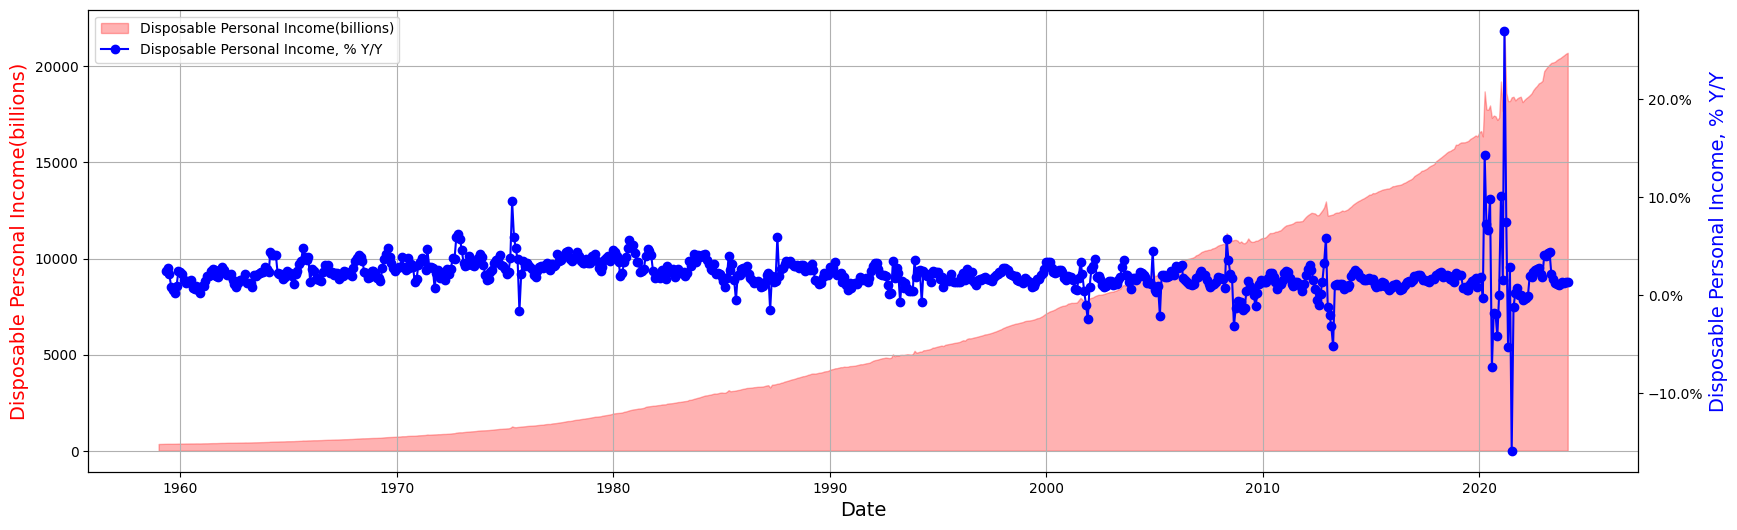

In [ ]:
# Plot of the Unemployment rate

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(dspi.index, dspi.DSPI, color="red", alpha=0.3, label="Disposable Personal Income(billions)")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(dspi.dspi_us_yoy, color="blue", marker="o", label="Disposable Personal Income, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Disposable Personal Income(billions)", color="red", fontsize=14)
ax2.set_ylabel("Disposable Personal Income, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

##### The Disposable Personal Income metric plot is important for my project because it tells me how much an individual or household has left after the deduction of Federal, State and Local taxes.

#### Question 7. [Exploratory] Time-driven strategy description around earnings releases. Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.


Predictive Analytics:

Predictive analytics involves using historical data to forecast potential scenarios and trends. By analyzing past events, you can make informed predictions about what might happen in the future.

To apply this strategy:

1. Gather relevant historical data on companies, such as financial performance, market trends, and industry-specific information.

2. Use machine learning algorithms to build predictive models that estimate future outcomes (e.g., stock price movements, revenue growth, or market share changes).

3. Identify companies with favorable predicted outcomes and prioritize them for further analysis.

In [ ]:
# With predictive analytics, a machine learning algorithm should predict revenue growth from the Voxeljet AG past data.

vjet = yf.download(tickers='VJET', period='max', interval='1d')
vjet.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,0.6401,0.6401,0.6401,0.6401,0.6401,0
2024-04-16,0.6401,0.6401,0.6401,0.6401,0.6401,0
2024-04-17,0.8000,1.0000,0.5650,1.0000,1.0000,2514
2024-04-18,0.5900,0.5911,0.5900,0.5911,0.5911,2644
2024-04-19,0.5800,0.7000,0.5800,0.5900,0.5900,17839


In [ ]:
# With predictive analytics, a machine learning algorithm should predict loss in revenue growth from the Cue Biopharma Inc past data.

cue = yf.download(tickers='CUE', period='max', interval='1d')
cue.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,1.57,1.670,1.47,1.495,1.495,286900
2024-04-17,1.50,1.640,1.50,1.630,1.630,315900
2024-04-18,1.64,1.650,1.56,1.580,1.580,169200
2024-04-19,1.56,1.605,1.52,1.560,1.560,169000
2024-04-22,1.55,1.575,1.49,1.530,1.530,85253
